In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x_train = x_train/255
x_test = x_test/255

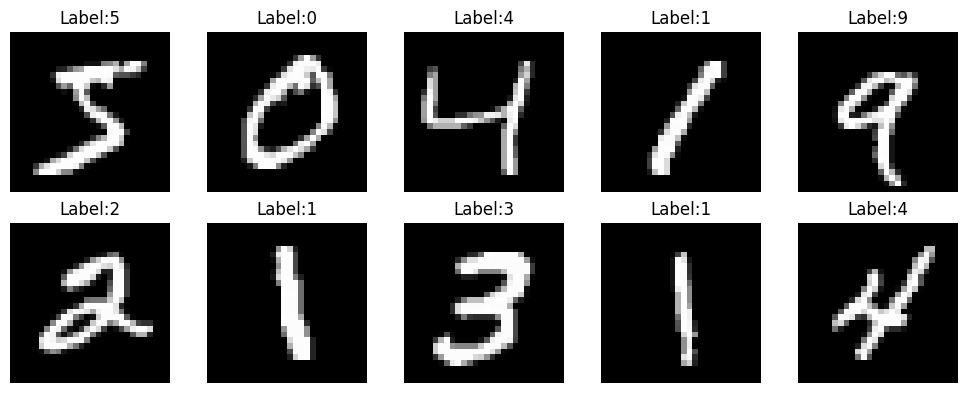

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(f"Label:{y_train[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Build a neural network
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8647 - loss: 0.4684 - val_accuracy: 0.9677 - val_loss: 0.1239
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9613 - loss: 0.1318 - val_accuracy: 0.9690 - val_loss: 0.1039
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9761 - loss: 0.0816 - val_accuracy: 0.9742 - val_loss: 0.0833
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9828 - loss: 0.0582 - val_accuracy: 0.9770 - val_loss: 0.0798
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9856 - loss: 0.0446 - val_accuracy: 0.9777 - val_loss: 0.0770
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9888 - loss: 0.0356 - val_accuracy: 0.9778 - val_loss: 0.0866
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9913 - loss: 0.0273 - val_accuracy: 0.9787 - val_loss: 0.0762
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9930 - loss: 0.0212 - 

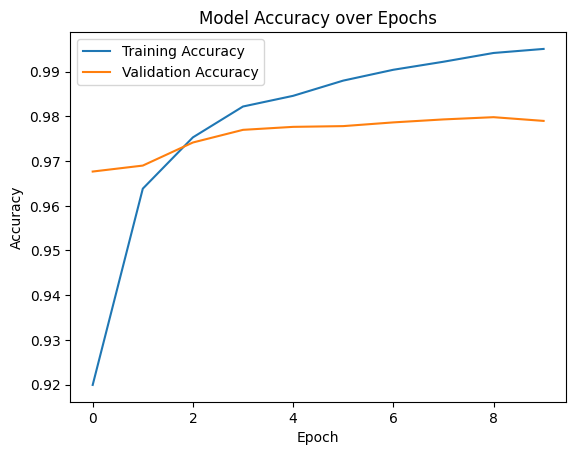

In [ ]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy over Epochs')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9710 - loss: 0.1106
Test accuracy: 0.9749


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


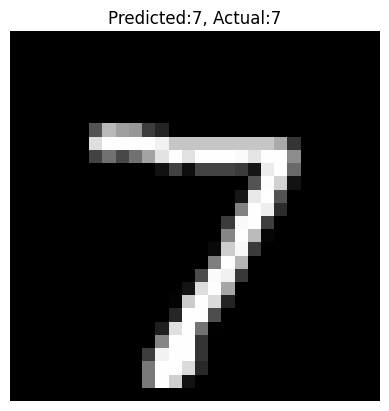

In [ ]:
sample_image = np.expand_dims(x_test[0],axis=0)
prediction = model.predict(sample_image)

predicted_label = tf.argmax(prediction[0]).numpy()
plt.imshow(x_test[0],cmap='gray')
plt.title(f"Predicted:{predicted_label}, Actual:{y_test[0]}")
plt.axis('off')
plt.show()

In [ ]:
#NLP
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
word_index = tf.keras.datasets.imdb.get_word_index()
index_word = {v+3: k for k, v in word_index.items()}
index_word[0] = "<PAD>"
index_word[1] = "<START>"
index_word[2] = "<UNK>"
index_word[3] = "<UNUSED>"

print("sample review:")
print(" ".join(index_word.get(i, "?") for i in x_train[0]))
print("Label:", y_train[0])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
sample review:
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole f

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen=256, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=256, padding='post', truncating='post')

In [ ]:
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=16, input_length=256),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train, epochs=10, batch_size=512, validation_split=0.2)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5771 - loss: 0.6913 - val_accuracy: 0.6964 - val_loss: 0.6813
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6906 - loss: 0.6751 - val_accuracy: 0.7148 - val_loss: 0.6476
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7166 - loss: 0.6366 - val_accuracy: 0.7724 - val_loss: 0.5913
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7690 - loss: 0.5769 - val_accuracy: 0.8040 - val_loss: 0.5280
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8191 - loss: 0.5051 - val_accuracy: 0.8116 - val_loss: 0.4728
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8316 - loss: 0.4480 - val_accuracy: 0.8380 - val_loss: 0.4274
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8513 - loss: 0.4013 - val_accuracy: 0.8340 - val_loss: 0.4001
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8623 - loss: 0.3664 - val_accuracy: 0.8570 - val_loss

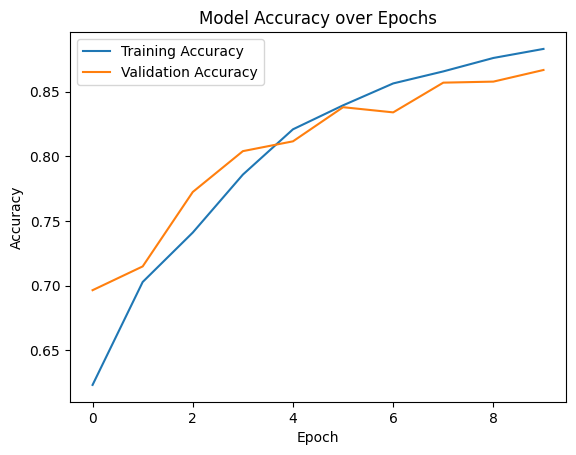

In [ ]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy over Epochs')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8585 - loss: 0.3523
Test accuracy: 0.8571


In [ ]:
sample_review = x_test[0]
sample_review_input = tf.expand_dims(sample_review, axis=0)
prediction = model.predict(sample_review_input)[0][0]

print(f"Predicted Sentiment: {'Positive' if prediction > 0.5 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Predicted Sentiment: Negative


In [ ]:
sample_index = 0
decoded_review = " ".join(index_word.get(i, "?")for i in x_test[sample_index] if i !=0)


In [ ]:
print(decoded_review)
print(y_test[0])

<START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss
0
